# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [35]:
temp.head(10)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [10]:
# your answer here
temp.info()
temp.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [22]:
# your answer here
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [73]:
# your answer here
temp.groupby('State').mean().loc[['New York']]

,Temperature
State,
New York,10.740741


In [75]:
temp.groupby('State').agg('mean').loc[['New York']]

,Temperature
State,
New York,10.740741


#### We want to know cities and states with Temperature above 15 degress Celcius

In [34]:
# your answer here
temp[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [42]:
# your answer here
temp[temp.Temperature > 15][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [67]:
# your answer here
temp[((temp.Temperature > 15) & (temp.Temperature < 20))]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [69]:
temp[((temp.Temperature > 15) & (temp.Temperature < 20))][['City']]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [72]:
# your answer here
temp.groupby('State').agg(['mean','std'])

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_3491/3026238463.py:2: FutureWarning: ['City'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp.groupby('State').agg(['mean','std'])


Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [77]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [83]:
# your answer here
employee.info()
employee.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

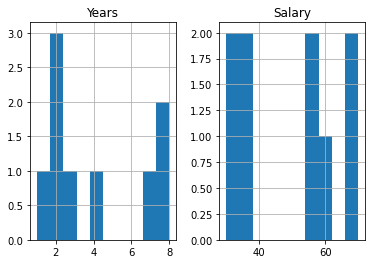

In [98]:
# your answer here
employee.hist()

#### What's the average salary in this company?

promedio de salario 48.888888888888886 

el salario que esta en la media 55.0 



array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

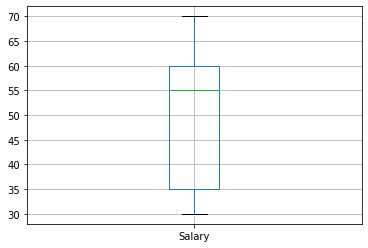

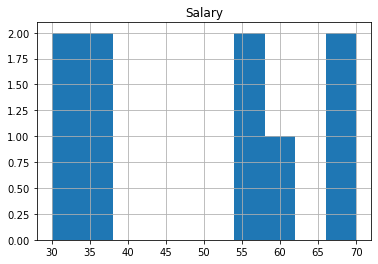

In [99]:
# your answer here


employee.boxplot('Salary')

print('promedio de salario',employee.Salary.mean(),'\n')
print('el salario que esta en la media',employee.Salary.median(),'\n')

employee.hist('Salary')

#### What's the highest salary?

el salario mas alto es 70


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

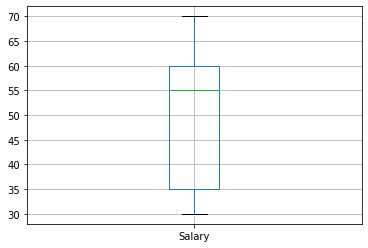

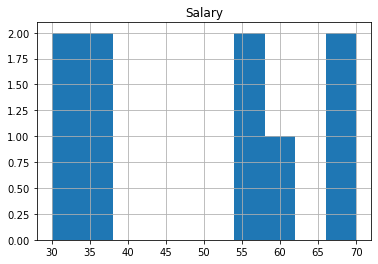

In [100]:
# your answer here
employee.boxplot('Salary')
print('el salario mas alto es',employee.Salary.max())

employee.hist('Salary')

#### What's the lowest salary?

el salario mas bajo es 30


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

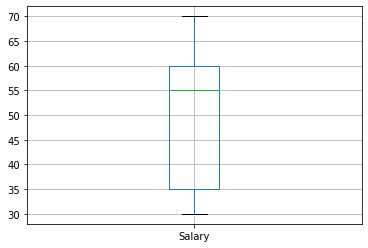

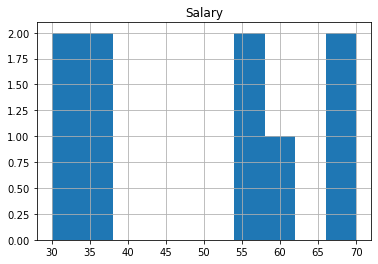

In [101]:
# your answer here
employee.boxplot('Salary')
print('el salario mas bajo es',employee.Salary.min())

employee.hist('Salary')

#### Who are the employees with the lowest salary?

In [103]:
# your answer here

employee[employee.Salary == 30][['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [105]:
# your answer here
employee[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [107]:
# your answer here
employee[employee.Name == 'David'][['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate

In [108]:
# your answer here
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [109]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [114]:
# your answer here- 2nd method
employee.loc[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [115]:
# your answer here
employee[(employee.Title == 'associate')&(employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [124]:
# your answer here
employee.groupby('Years').agg('mean')

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


In [128]:
employee.sort_values('Years')

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55
4,Samuel,Sales,Master,M,associate,3,55
3,Sonia,HR,Bachelor,F,analyst,4,35
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


####  What is the average Salary per title?

In [130]:
# your answer here
employee.groupby('Title').agg('mean')[['Salary']]

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

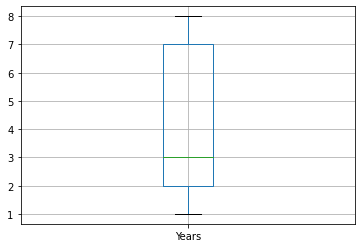

In [133]:
# draw boxplot here
employee.boxplot('Years')
#employee.boxplot('Salary')

boxplot de salario es:


<AxesSubplot:>

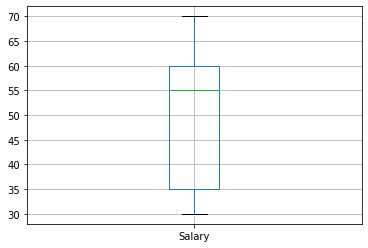

In [140]:
print('boxplot de salario es:')
employee.boxplot('Salary')

In [138]:
# print first quartile here
print('el primer cuartile de 25% en salario es de ',employee.Salary.quantile(.25))

el primer cuartile de 25% en salario es de  35.0


In [139]:
# print third quartile here
print('el primer cuartile de 75% en salario es de ',employee.Salary.quantile(.75))

el primer cuartile de 75% en salario es de  60.0


#### Is the mean salary per gender different?

In [141]:
# your answer here
employee.groupby('Gender').mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [143]:
# your answer here
employee.groupby('Department').agg(['min','mean','max'])

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_3491/3302724837.py:2: FutureWarning: ['Name', 'Education', 'Gender', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  employee.groupby('Department').agg(['min','mean','max'])


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [146]:
# your answer here
employee.groupby('Department').agg([lambda x: np.max(x) - np.min(x)])
#df_nulos.groupby('make', as_index = False)[['cylinders']].agg(['min', 'max', 'mean', lambda x: np.sum(x)/45, np.sum])

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_3491/1325873522.py:2: FutureWarning: ['Name', 'Education', 'Gender', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  employee.groupby('Department').agg([lambda x: np.max(x) - np.min(x)])


,Years,Salary
,<lambda>,<lambda>
Department,,
HR,6,40
IT,7,40
Sales,1,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [169]:
# your answer here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [170]:
# your answer here
orders.info()
orders.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [171]:
orders.set_index('InvoiceNo', inplace = True)
orders.head(1)


,Unnamed: 0,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,,
536365,0,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [172]:
orders.drop('Unnamed: 0', axis = 1, inplace=True)

In [180]:
orders.head(5)

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [174]:
# your answer here
orders.describe()

,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [175]:
# your answer here
orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [176]:
# your answer here
orders.UnitPrice.max()

8142.75

In [177]:
# your answer here
orders.UnitPrice.min()

0.0

In [179]:
orders.shape

(397924, 12)

#### Select all the customers we have in Spain

In [183]:
# your answer here
orders[orders.Country=='Spain']

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...
581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90


In [181]:
orders.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [187]:
# your answer here
orders.Country.value_counts()[['Spain']]

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [194]:
# your answer here
orders[orders.Quantity > 50]

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...
581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20


#### Select orders from Spain that are above 50 items

In [197]:
# your answer here
orders[(orders.Country == 'Spain')&(orders.Quantity > 50)]

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16


#### Select all free orders

In [206]:
# your answer here
orders[orders.amount_spent == 0]

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0


In [205]:
orders.head(1)

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,
536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [213]:
# your answer here
orders[orders.Description == 'lunch bag']

,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
InvoiceNo,,,,,,,,,,,,


In [230]:
#orders.filter(like = 'lunch bag')
orders.filter(regex = 'lunch bag')
#orders.Description.value_counts()

white hanging heart t-light holder    2028
regency cakestand 3 tier              1724
jumbo bag red retrospot               1618
assorted colour bird ornament         1408
party bunting                         1397
                                      ... 
ruby glass cluster earrings              1
pink chrysanthemums art flower           1
72 cake cases vintage christmas          1
wall art , the magic forest              1
paper craft , little birdie              1
Name: Description, Length: 3877, dtype: int64

In [231]:
orders.index.value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: InvoiceNo, Length: 18536, dtype: int64

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here